<a href="https://colab.research.google.com/github/ArmandDS/latin_news_web_scrapper/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Second of the Text analysis of the scrapped data: The EDA 

Import the libraries 


In [2]:
import pandas as pd
import numpy as np
import re


Read the Data File

In [3]:
df = pd.read_csv("df_all_dataframe.csv")
df.head()

,Unnamed: 0,title,summary,text,link,date,name
0,0,"Coronavirus EN VIVO | Últimas noticias, casos...",Coronavirus EN VIVO en el mundo | Sigue aquí E...,Coronavirus EN VIVO | Sigue aquí EN DIRECTO l...,https://elcomercio.pe/mundo/coronavirus-en-viv...,2020-08-31,el comercio
1,1,"La peculiar historia de Sealand, la pequeña m...","Con una superficie de solo 0,004 km2 y ubicado...",Esta historia comienza con un correo electrón...,https://elcomercio.pe/mundo/europa/sealand-la-...,2020-08-31,el comercio
2,2,Ciudadanos chinos son obligados a tomar medic...,El gobierno de la región de Xinjiang está toma...,El gobierno de la región de Xinjiang está tom...,https://elcomercio.pe/mundo/asia/coronavirus-e...,2020-08-31,el comercio
3,3,"Venezuela: liberan a Roberto Marrero, jefe de...","El jefe del despacho del presidente interino, ...","Roberto Marrero, jefe del despacho del presid...",https://elcomercio.pe/mundo/venezuela/roberto-...,2020-08-31,el comercio
4,4,Venezuela: Maduro indulta a 110 dirigentes de...,"Fuera de la larga lista de indultados, se han ...",Las autoridades venezolanas comenzaron a exca...,https://elcomercio.pe/mundo/venezuela/venezuel...,2020-08-31,el comercio


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df.shape

(1636, 6)

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Function to clean the data

In [7]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = str(text).lower()
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!¡¿?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text= re.sub("\d", " ", text)
    text= re.sub("-", " ", text)
    text= re.sub('"', " ", text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("spanish"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

Example of a clean text

In [8]:
# Clean texts
clean_text(df['text'][0])

'coronavirus vivo sigue aquí directo últimas noticias conoce cifras actualizadas casos muertes pandemia covid día hoy lunes agosto deja millones contagiados menos mil fallecidos países orbe según recuento independiente realiza universidad johns hopkins unidos alcanzó domingo cifra casos confirmados coronavirus fallecidos acuerdo recuento independiente universidad johns hopkins balance hora local gmt lunes contagios sábado nuevas muertes pese nueva york mayor número contagios sigue golpeado cuanto muertos unidos francia españa tan solo ciudad nueva york muerto personas parte brasil registró muertes vinculadas covid último día acumula fallecidos total según informó gobierno domingo dejó escenas playas llenas bañistas sao paulo río janeiro dos regiones golpeadas pandemia acuerdo boletín ministerio salud número infectados llegó país tras sumar nuevos positivos últimas horas domingo cuarto día consecutivo debajo millar muertos diario aunque cifras fines semana suelen ser inferiores debido m

Now apply the function to the whole 
data

In [9]:
df["clean_text"] = df['text'].apply(clean_text)
df.head()

,title,summary,text,link,date,name,clean_text
0,"Coronavirus EN VIVO | Últimas noticias, casos...",Coronavirus EN VIVO en el mundo | Sigue aquí E...,Coronavirus EN VIVO | Sigue aquí EN DIRECTO l...,https://elcomercio.pe/mundo/coronavirus-en-viv...,2020-08-31,el comercio,coronavirus vivo sigue aquí directo últimas no...
1,"La peculiar historia de Sealand, la pequeña m...","Con una superficie de solo 0,004 km2 y ubicado...",Esta historia comienza con un correo electrón...,https://elcomercio.pe/mundo/europa/sealand-la-...,2020-08-31,el comercio,historia comienza correo electrónico nunca olv...
2,Ciudadanos chinos son obligados a tomar medic...,El gobierno de la región de Xinjiang está toma...,El gobierno de la región de Xinjiang está tom...,https://elcomercio.pe/mundo/asia/coronavirus-e...,2020-08-31,el comercio,gobierno región xinjiang tomando medidas draco...
3,"Venezuela: liberan a Roberto Marrero, jefe de...","El jefe del despacho del presidente interino, ...","Roberto Marrero, jefe del despacho del presid...",https://elcomercio.pe/mundo/venezuela/roberto-...,2020-08-31,el comercio,roberto marrero jefe despacho presidente inter...
4,Venezuela: Maduro indulta a 110 dirigentes de...,"Fuera de la larga lista de indultados, se han ...",Las autoridades venezolanas comenzaron a exca...,https://elcomercio.pe/mundo/venezuela/venezuel...,2020-08-31,el comercio,autoridades venezolanas comenzaron excarcelar ...


## Some visualizatons about the data

Word Frecuency

In [10]:
from collections import Counter

In [11]:

# word_freq = Counter(words)
df_wf = pd.DataFrame(pd.Series(' '.join(df['clean_text']).split()).value_counts()[:20]).reset_index()
df_wf.columns = ["word", "freq"]
df_wf

,word,freq
0,país,2124
1,trump,1781
2,casos,1629
3,dijo,1583
4,años,1580
5,unidos,1564
6,personas,1455
7,coronavirus,1442
8,covid,1436
9,presidente,1433


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

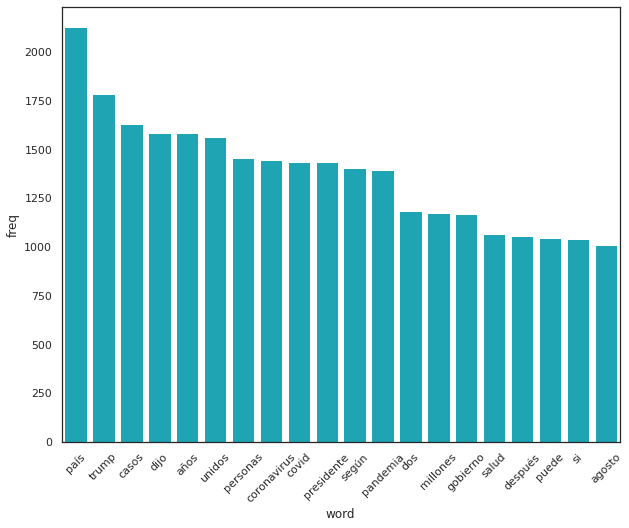

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")
ax = sns.barplot(x="word", y="freq",  data=df_wf, color = "#05B8CC")
plt.xticks(rotation=45)

The most commons words in our dataset is about "pais" (country), Trump, Casos (cases refer to the coronavirus), and words similar

Now let's get the see the most comon pair of words

In [13]:
bigram = ["_".join(x) for x in  (nltk.bigrams(' '.join(df['clean_text']).split()))]

In [14]:
len(bigram)

423869

In [15]:
df_bigram = pd.DataFrame(Counter(bigram).most_common(20), columns=['pair_word', 'freq'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

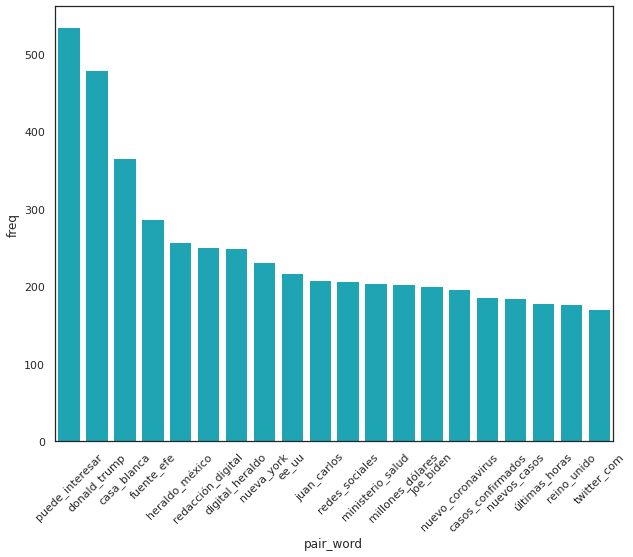

In [16]:
sns.set_style("white")
ax = sns.barplot(x="pair_word", y="freq",  data=df_bigram, color = "#05B8CC")
plt.xticks(rotation=45)

These bigrams appear to indicate that in the las month the news are mainly about the covid and the EEUU election ( Trump and Biden)

Now let´s compare among the newspaper

In [17]:
df['len'] = df['clean_text'].apply(lambda x: len(x.split()))


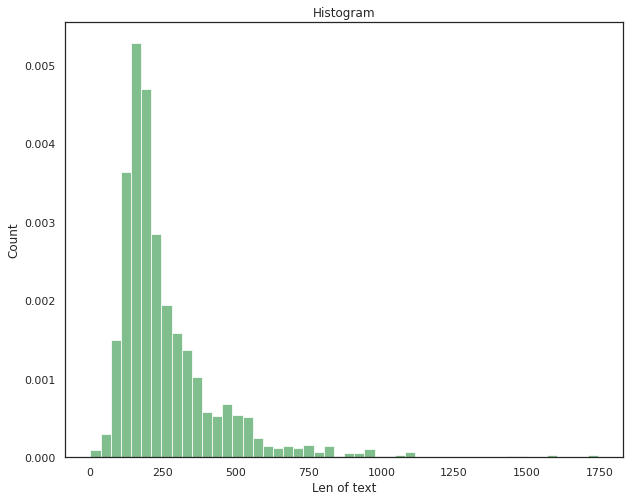

In [18]:
# the histogram of the data
plt.hist(df['len'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Len of text')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

In [76]:
 int(np.quantile(df['len'], 0.9))

476

It seen that the 90% of the data has less of 476 words (clean data)

Thw word count by newspaper

In [19]:
list_df = []
for name  in df['name'].unique():
  print(name)
  df_wf = pd.DataFrame(pd.Series(' '.join(df[df['name'] == name]['clean_text']).split()).value_counts()[:20]).reset_index()
  df_wf.columns = ["word", "freq"]
  list_df.append(df_wf)

el comercio
el heraldo
el nuevo siglo
la prensa grafica


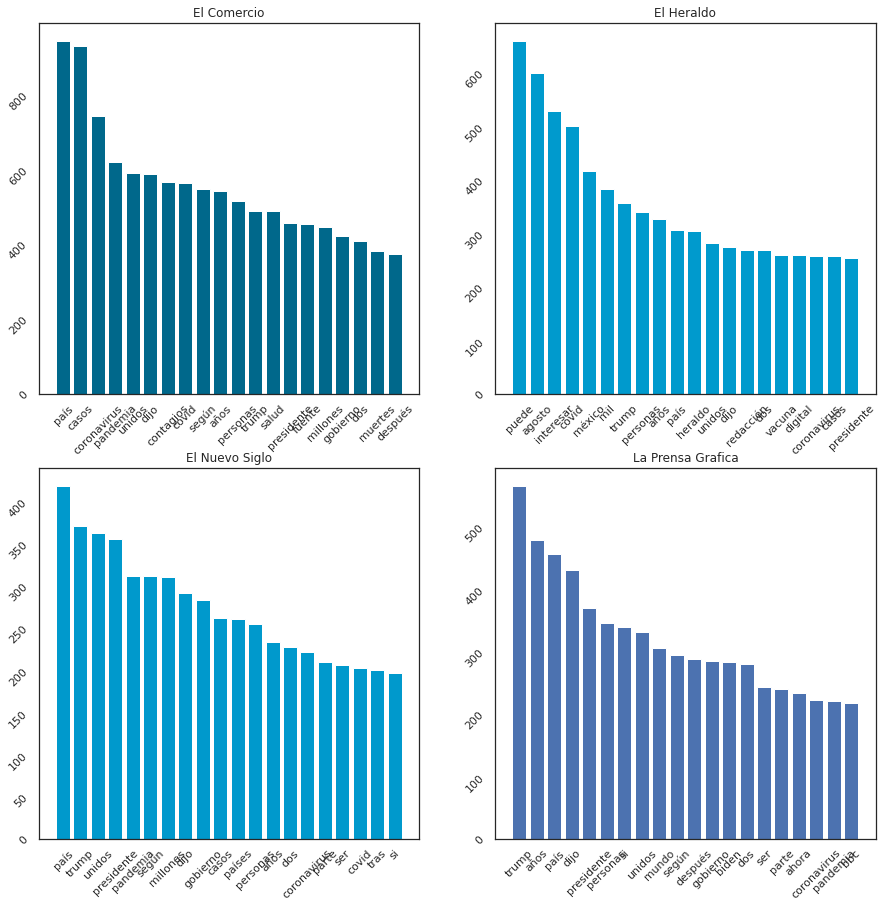

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0, 0].bar(list_df[0]["word"], list_df[0]["freq"], color = "#00688B")
axs[0, 0].set_title('El Comercio')
axs[0, 1].bar(list_df[1]["word"], list_df[1]["freq"], color= "#009ACD")
axs[0, 1].set_title('El Heraldo')
axs[1, 0].bar(list_df[2]["word"], list_df[2]["freq"], color= "#0099CC")
axs[1, 0].set_title('El Nuevo Siglo')
axs[1, 1].bar(list_df[3]["word"], list_df[3]["freq"])
axs[1, 1].set_title('La Prensa Grafica')
for ax in axs.flat:
    ax.tick_params(labelrotation=45)

The newspaper "el comercio" and "El heraldo"  write a little more about "pais" (country) and the coronavirus and trump, whereas "la prensa grafica" and "El nuevo siglo" mention Trump a little more

## Now, let´s check the similarity between the bigram using Spacy

In [ ]:
!python -m spacy download es_core_news_md

In [23]:
import spacy
nlp = spacy.load('/usr/local/lib/python3.6/dist-packages/es_core_news_md/es_core_news_md-2.2.5')

Get the spanish embeddings


In [24]:
vocab = []

for word in ' '.join(df['clean_text']).split():
  if word not in vocab:
    vocab.append(word)

In [26]:
tokens = nlp(' '.join(vocab))
word_embeding = {}
for token in tokens:
  if token.text not in word_embeding.keys():
    word_embeding[token.text] =  token.vector
  # print(token.text, token.has_vector, token.vector_norm, token.is_oov)

In [29]:
pair_emb = []
pair_w = []
for pair_word in bigram:
  w1, w2 = pair_word.split("_")
  try:
    pair_emb.append(np.mean([word_embeding[w1], word_embeding[w2]], axis=0))
    pair_w.append(pair_word)
  except:
    if w1 in word_embeding.keys():
      pair_emb.append(word_embeding[w1])
      pair_w.append(pair_word)
    elif w2 in word_embeding.keys():
      pair_emb.append(word_embeding[w2])
      pair_w.append(pair_word)
    else:
      continue



In [30]:
assert len(pair_emb ) == len(pair_w)

## Plot the 2D 

In [32]:
from sklearn.manifold import TSNE

find tsne coords for 2 dimensions

In [71]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(np.squeeze(pair_emb[:15000]))

### Plot the scatter

In [72]:
random_list = np.random.choice(pair_w, 200, replace=False)

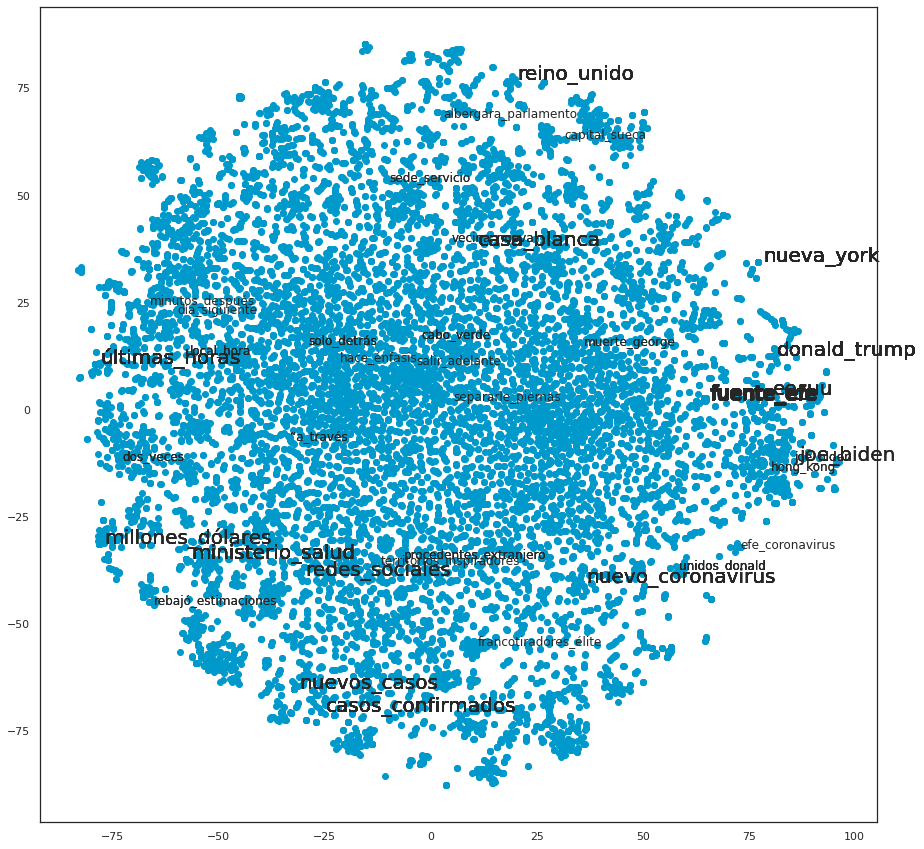

In [75]:
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.figure(figsize=(15,15))
plt.scatter(x_coords, y_coords, color = "#0099CC")
for label, x, y in zip(pair_w, x_coords, y_coords):
  if label in df_bigram['pair_word'].tolist():
    plt.annotate(label, xy=(x, y), xytext=(5, 0), textcoords='offset points', fontsize= 20)
  if label in random_list:
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()

It seem some trvial pair or word related like "Donal Trump" with "joe biden" (politics),  nuevos casos ( new cases) with  "casos confirmados" (confirme cases) just to point a few of them , due to time I can't make the TSNE plot with al the data

My data science's blog:
https://medium.com/@armandj.olivares